In [ ]:
#线性分类：逻辑回归、线性判别分析
#非线性回归：K 近邻 、贝叶斯分类器、分类与回归树、支持向量机。

In [2]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
filename = 'data/pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
# 将数据分为输入数据和输出结果
array = data.values
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression() #逻辑回归
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.7695146958304853


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis() #线性判别分析
result = cross_val_score(model, X, Y, cv=kfold) 
print(result.mean())

0.773462064251538


In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() #K近邻算法
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.7265550239234451


In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() #贝叶斯分类器
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.7551777170198223


In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() #决策树
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.7043916609706082


In [8]:
from sklearn.svm import SVC
model = SVC() #SVM
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.6510252904989747


LR: 0.770 (0.048)
LDA: 0.773 (0.052)
KNN: 0.727 (0.062)
CART: 0.699 (0.052)
SVM: 0.651 (0.072)
NB: 0.755 (0.043)


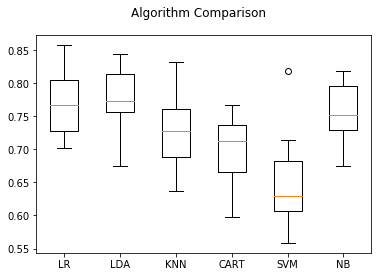

In [11]:
from matplotlib import pyplot

models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()
results = []
for name in models:
    result = cross_val_score(models[name], X, Y, cv=kfold)
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)

# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import  Pipeline
from sklearn.feature_selection import SelectKBest
# 生成 feature union
features = []
features.append(('pca', PCA()))
features.append(('select_best', SelectKBest(k=6)))
# 生成 Pipeline
steps = []
steps.append(('feature_union', FeatureUnion(features)))
steps.append(('logistic', LogisticRegression()))
model = Pipeline(steps)
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.7799555707450445


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
steps = []
# 创建Pipeline
steps.append(('Standardize', StandardScaler()))
steps.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(steps)
result = cross_val_score(model, X, Y, cv=kfold)
print(result.mean())

0.773462064251538
